In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from model import Schelling

Now we instantiate a model instance: a 20x20 grid, with an 80% chance of an agent being placed in each cell, and approximately 30% of agents set as minorities.

In [2]:
model = Schelling(20, 20, 0.7, 0.3)

today


In [3]:
#Running the model for a certain amount of steps
while model.running and model.schedule.steps < 50:
    model.step()
print(model.schedule.steps) # Show how many steps have actually run

(0, 13)
(17, 5)
(6, 4)
(1, 16)
(3, 12)
(4, 18)
(10, 1)
(14, 18)
(4, 14)
(8, 4)
(1, 18)
(0, 9)
(6, 19)
(12, 8)
(0, 9)
(7, 12)
(10, 1)
(9, 16)
(1, 0)
(1, 19)
(3, 19)
(5, 16)
(3, 8)
(12, 10)
(11, 5)
(1, 16)
(8, 14)
(9, 19)
(6, 4)
(10, 1)
(11, 19)
(15, 12)
(12, 10)
(1, 19)
(12, 16)
(12, 8)
(9, 7)
(1, 6)
(5, 15)
(9, 0)
(9, 7)
(0, 11)
(5, 9)
(8, 16)
(1, 0)
(5, 18)
(14, 13)
(10, 7)
(6, 12)
(11, 1)
(19, 17)
(12, 16)
(18, 19)
(1, 5)
(3, 9)
(1, 9)
(1, 0)
(11, 7)
(17, 18)
(19, 9)
(1, 5)
(12, 8)
(8, 3)
(3, 3)
(14, 4)
(4, 4)
(3, 1)
(3, 8)
(9, 16)
(3, 3)
(5, 18)
(3, 8)
(1, 2)
(3, 8)
(0, 11)
(17, 18)
(14, 14)
(5, 9)
(0, 12)
(3, 9)
(13, 12)
(3, 8)
(14, 19)
(16, 6)
(15, 9)
(19, 12)
(18, 16)
(17, 8)
(6, 19)
(19, 9)
(15, 2)
(3, 8)
(3, 1)
(11, 14)
(14, 17)
(19, 4)
(10, 18)
(7, 19)
(16, 3)
(9, 13)
(18, 15)
(0, 19)
(16, 8)
(19, 12)
(6, 4)
(14, 19)
(16, 6)
(13, 6)
(14, 4)
(11, 14)
(5, 4)
(8, 0)
(3, 6)
(10, 19)
(5, 10)
(12, 16)
(14, 1)
(10, 14)
(10, 1)
(1, 0)
(16, 3)
(6, 5)
(11, 9)
(8, 0)
(12, 0)
(14, 14)
(19

## Analysing the results (Heatmaps) ##

The plots below are visualisation of the grid and how certain (properties of) agents are distributed throughout.

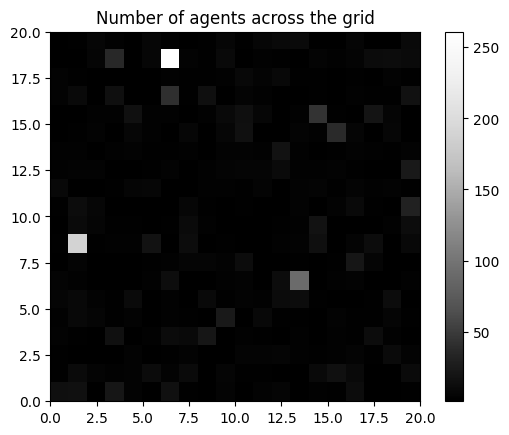

In [20]:
import numpy as np

agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content = cell[0]
    x = cell[1][0]
    y = cell[1][1]
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, cmap="Greys_r", interpolation='nearest', extent=(0, model.grid.width, 0, model.grid.height))
plt.title('Number of agents across the grid')
plt.colorbar()

As you can see from the above plot, after not many ticks, most agents are concentrated in a few cells. This is mainly due to the reds/majority moving to these 'wealthier' parcels (see third plot).

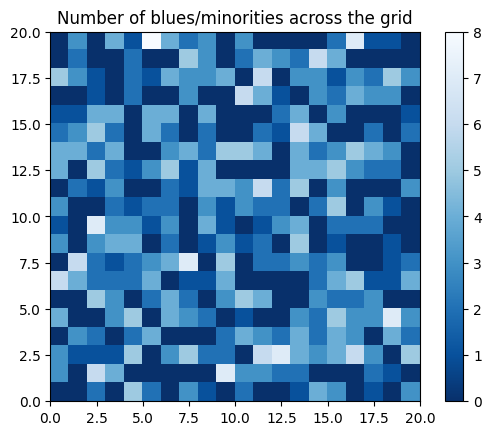

In [18]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    number_blues = 0
    cell_content = cell[0]
    x = cell[1][0]
    y = cell[1][1]
    for agent in cell_content:
        if agent.type == 1:
            number_blues += 1
    agent_count = number_blues
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts,  cmap="Blues_r",interpolation='nearest', extent=(0, model.grid.width, 0, model.grid.height))
plt.title('Number of blues/minorities across the grid')
plt.colorbar()

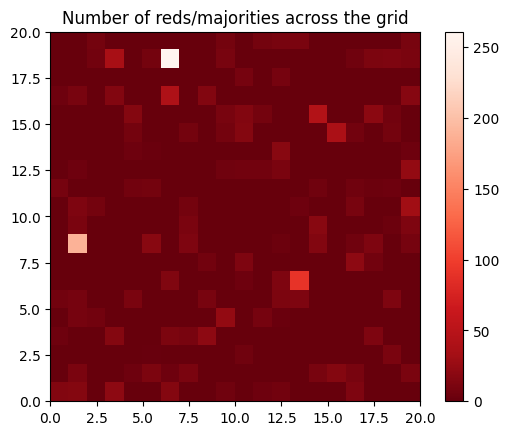

In [17]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    number_reds = 0
    cell_content = cell[0]
    x = cell[1][0]
    y = cell[1][1]
    for agent in cell_content:
        if agent.type == 0:
            number_reds += 1
    agent_count = number_reds
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts,cmap="Reds_r", interpolation='nearest', extent=(0, model.grid.width, 0, model.grid.height))
plt.title('Number of reds/majorities across the grid')
plt.colorbar()

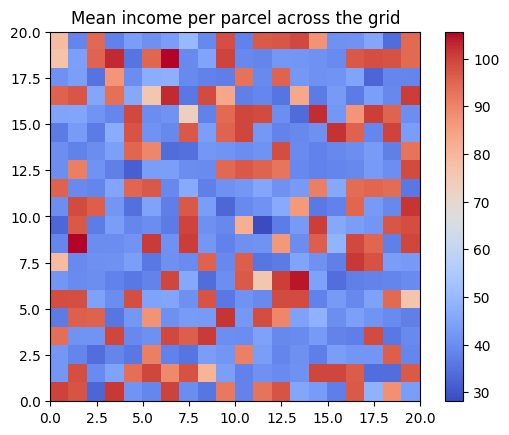

In [15]:
from statistics import mean

agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    list_income = []
    cell_content = cell[0]
    x = cell[1][0]
    y = cell[1][1]
    for agent in cell_content:
        list_income.append(agent.income)
    mean_income = mean(list_income)
    agent_count = mean_income
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, cmap="coolwarm", interpolation='nearest', extent=(0, model.grid.width, 0, model.grid.height))
plt.title('Mean income per parcel across the grid')
plt.colorbar()